# 1. Un problema de clasificación

Este conjunto de datos es una versión modificada del utilizado en el artículo "Scaling Up the
Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", escrito por Ron Kohavi. Los
datos originales se pueden encontrar en el UC Irvine Machine Learning Repository.
El objetivo es predecir si los ingresos de una persona superan o no los 50.000$ (variable
income). Para ello, se tienen 13 características:
* age: Edad
* workclass: tipo de ocupación (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked)
* education_level: Nivel educativo (Bachelors, Some-college, 11th, HS-grad,
Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool)
* education-num: Número de años de educación completados.
* marital-status: estado civil (Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
* occupation: ocupación (Tech-support, Craft-repair, Other-service, Sales,
Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,
Armed-Forces)
* relationship: familia (Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried)
* race: raza (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* sex: Género (Female, Male)
* capital-gain: Ganancia de capitales
* capital-loss: Pérdida de capitales
* hours-per-week: Promedio de horas trabajadas por semana
* native-country: País de origen (United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South,
China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,
Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti,
Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,
El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands)



## Importamos librerías

In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

## Cargamos datos

In [137]:
income = pd.read_csv('census.csv',sep=',', decimal='.')
income.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Análisis exploratorio

In [138]:
#Buscamos datos descriptivos de cada columna, para hacernos una idea del dataset con el que trabajamos
income.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [139]:
#Miramos el tamaño del dataset
income.shape

(45222, 14)

In [140]:
#miramos tipología de datos, por si hay que transformar alguno
income.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

No parece haber missings (todas las variables observadas tienen el mismo número de ocurrencias), y parece haber outliers en casi todas, lo observaremos más adelante

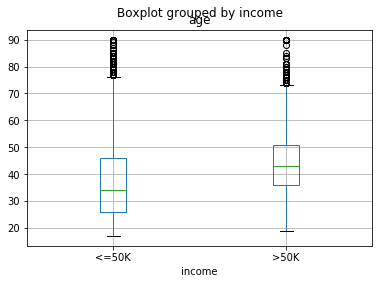

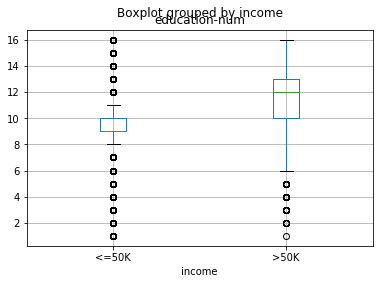

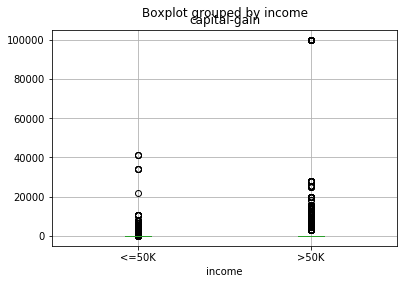

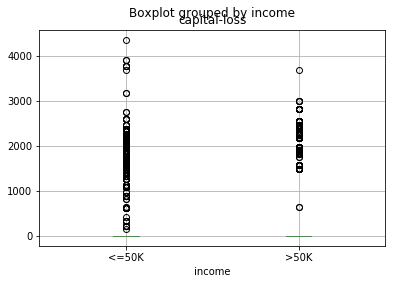

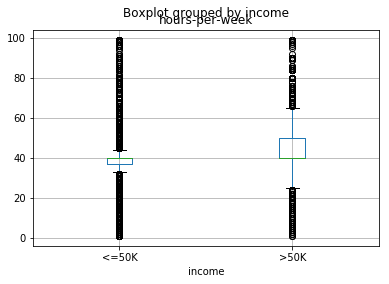

In [141]:
#buscamos outliers con boxplot para las numéricas:

income.boxplot(by = 'income' ,column = 'age')

income.boxplot(by = 'income' ,column = 'education-num')

income.boxplot(by = 'income' ,column = 'capital-gain')

income.boxplot(by = 'income' ,column = 'capital-loss')

income.boxplot(by = 'income' ,column = 'hours-per-week')


Hay muchos outliers, pero con mucha densidad de población (o así parece verse en los gráficos). A destacar el volumen de ocurrencias por encima de las 70 horas semanales, notándose gran diferencia entre los que ganan más. En edad, se observa que la media de los que ganan más es más alta, y se observa que la gente con más ingresos tiene mayor cantidad de años estudiados que los que no. No considero apropiado eliminar nada de momento

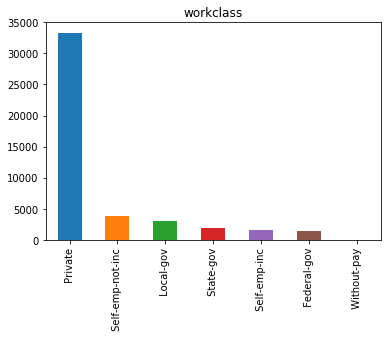

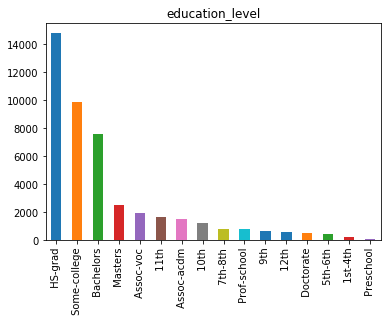

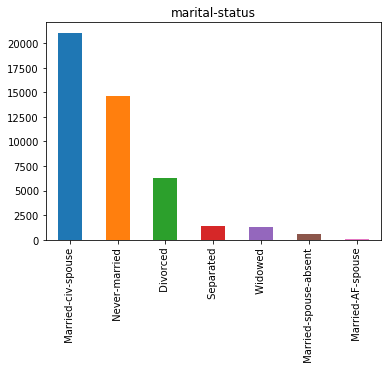

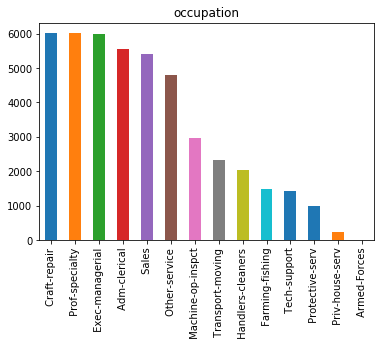

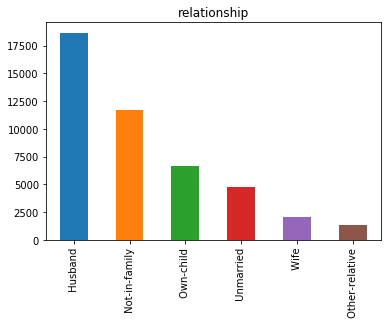

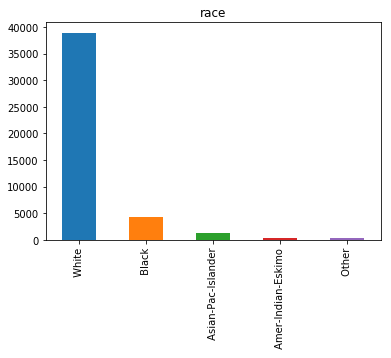

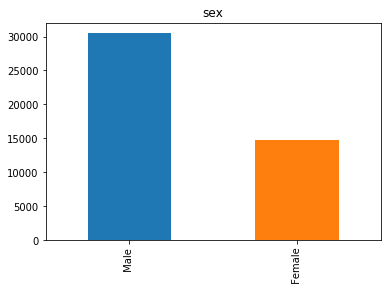

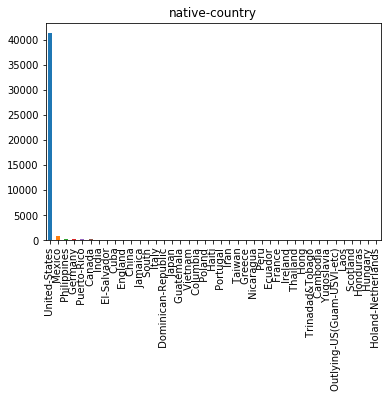

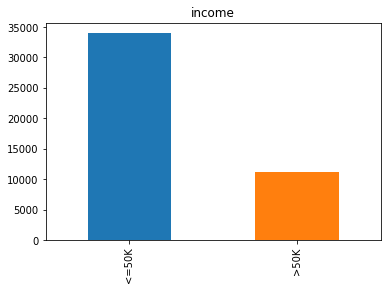

In [142]:
#miramos la distribución para las categóricas, para ver si alguna apenas está presente y tratar de buscar información
#seleccionamos las columnas categóricas y las pintamos con gráficos de barras
columnas = income.columns.tolist()
columnas1 = columnas[1:3] + columnas[4:9] + columnas[12:]
for col in columnas1:
    income[col].value_counts().plot(kind='bar',title=col)
    plt.show()

Obtenemos alguna información sobre la población de muestra: más hombres que mujeres, la mayoría blancos, trabajadores del sector privado y estadounidenses. Parece llamativo lo de la raza y la procedencia, pero de momento no nos aporta mayor info. Lo más relevante es el último gráfico: la muestra está muy desbalanceada, hay muchísimos más casos en los que los ingresos están por debajo de 50k, tendremos que tener esto en cuenta a la hora de elegir la métrica con la que testeemos los algoritmos

In [143]:
#A continuación vamos a codificar las variables categóricas, distinguiendo para ello 2 grupos: 
#Por un lado, education_level, ya que tiene un orden claro que queremos marcar (lo haremos usando un mapeo).

#creamos el diccionario:
dict1 ={' Preschool': 0,' 1st-4th': 1,' 5th-6th': 2,' 7th-8th':3,' 9th': 4,' 10th': 5,' 11th': 6,' 12th': 7,' HS-grad': 8,
        ' Prof-school': 9,' Assoc-acdm': 10,' Assoc-voc': 11,' Some-college': 12,' Bachelors': 13,' Masters': 14,' Doctorate': 15}


#mapeamos:
income['education_level'] = income['education_level'].map(dict1)


In [144]:
#Con la variable objetivo hacemos labelencoder:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
income['income'] = le.fit_transform(income['income'])

In [145]:
income.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,13,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,8,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,6,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,13,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [146]:
#Por otro, el resto. En estas usaremos get_dummies. 
#Eliminamos la columna education_level de la selección anterior y comprobamos
columnas2 = columnas[1:2] + columnas[4:9] + columnas[12:13]
columnas2


['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [147]:
#Aplicamos get_dummies:
for col in columnas2:
    dummy = pd.get_dummies(income[col], prefix = col)
    income = pd.concat([income,dummy],axis=1).drop([col],axis=1)
    
income.head()

,age,education_level,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,8,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,6,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [148]:
#Analizamos correlación entre variables:
income.corr()

,age,education_level,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,-0.013286,0.037623,0.079683,0.059351,0.101992,0.237040,0.054823,0.063694,-0.209763,...,0.005608,0.004745,0.011859,0.000236,-0.007639,-0.000654,0.002844,0.012082,-0.014403,0.003294
education_level,-0.013286,1.000000,0.877316,0.063320,0.058875,0.095587,0.261963,0.054243,0.090592,-0.129183,...,-0.049448,-0.041885,0.001258,0.013950,0.034695,0.001837,-0.008017,0.138430,-0.007174,-0.007615
education-num,0.037623,0.877316,1.000000,0.126907,0.081711,0.146206,0.332800,0.054970,0.096524,-0.164869,...,-0.047135,-0.043631,0.001084,0.016338,0.046099,0.007379,-0.010147,0.132242,-0.010287,-0.006425
capital-gain,0.079683,0.063320,0.126907,1.000000,-0.032102,0.083880,0.221034,-0.004223,-0.012118,-0.047957,...,-0.004352,-0.006274,-0.003086,-0.001270,0.005585,-0.002868,-0.003134,0.010938,-0.002712,-0.000556
capital-loss,0.059351,0.058875,0.081711,-0.032102,1.000000,0.054195,0.148687,0.009106,0.009450,-0.032965,...,-0.008106,0.003320,-0.004602,0.002970,0.002227,-0.002339,0.004380,0.011766,0.000095,-0.004935
hours-per-week,0.101992,0.095587,0.146206,0.083880,0.054195,1.000000,0.227199,0.007387,-0.001639,-0.094559,...,0.004322,-0.010713,0.001422,0.015420,0.000233,0.010315,-0.004179,0.010228,-0.008040,-0.001354
income,0.237040,0.261963,0.332800,0.221034,0.148687,0.227199,1.000000,0.059174,0.029731,-0.116721,...,-0.004660,-0.019280,-0.007203,-0.007630,0.016706,-0.004426,-0.009495,0.038913,-0.016239,0.005224
workclass_ Federal-gov,0.054823,0.054243,0.054970,-0.004223,0.009106,0.007387,0.059174,1.000000,-0.048596,-0.299500,...,-0.003194,0.009355,-0.003768,-0.003077,-0.006251,-0.004538,0.001019,0.016367,-0.001728,-0.004041
workclass_ Local-gov,0.063694,0.090592,0.096524,-0.012118,0.009450,-0.001639,0.029731,-0.048596,1.000000,-0.453573,...,-0.005322,0.001415,-0.005706,-0.012835,-0.004445,-0.003415,0.000795,0.034298,-0.003455,-0.002238
workclass_ Private,-0.209763,-0.129183,-0.164869,-0.047957,-0.032965,-0.094559,-0.116721,-0.299500,-0.453573,1.000000,...,0.005882,0.010598,0.005419,-0.017427,-0.005053,-0.002695,-0.000313,-0.047663,0.008056,0.000134


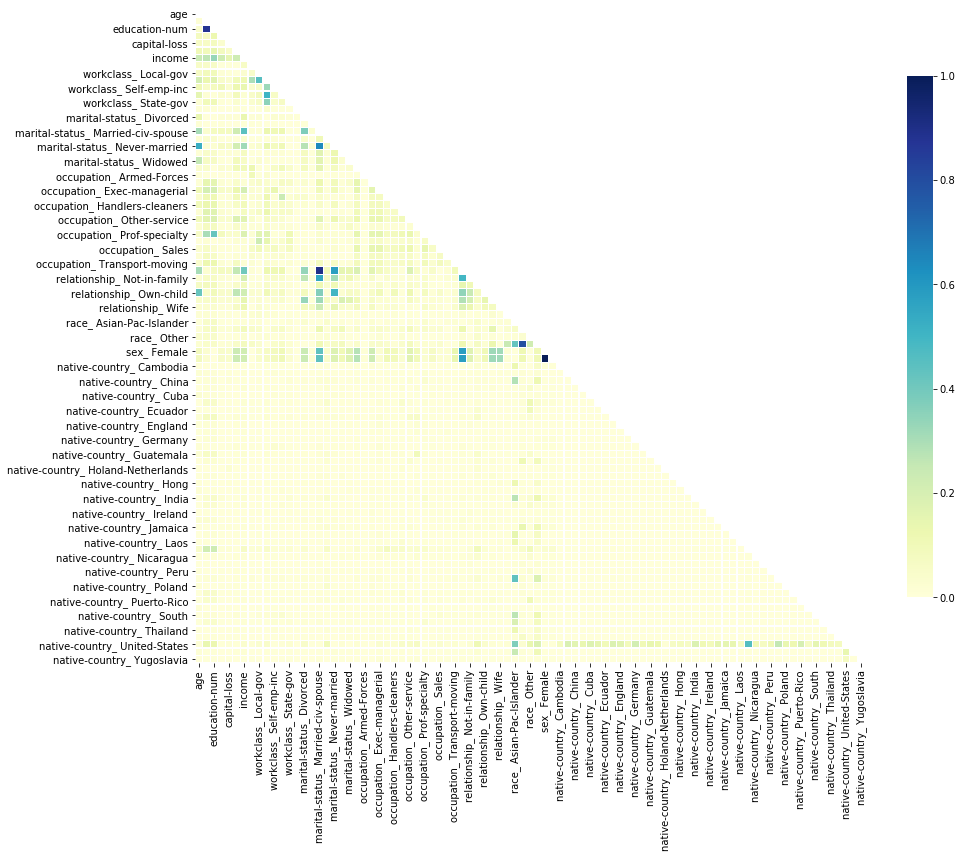

In [149]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(income.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [150]:
#Buscamos columnas con correlación alta:

# Create correlation matrix
corr_matrix = income.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
pairs = np.where(upper>0.85)
fx = income.columns[pairs[0]]
fy = income.columns[pairs[1]]

for f1,f2 in zip(fx,fy):
    print(f1,f2)


education_level education-num
marital-status_ Married-civ-spouse relationship_ Husband
sex_ Female sex_ Male


Eliminamos education_num de la lista de variables a tratar. Parece tener sentido que a más años estudiando más nivel alcanzado. Las demás, poca información adicional, más allá de que parece haber muchos más maridos que mujeres con matrimonio civil entre los encuestados 

In [151]:
income = income.drop(['education-num'], axis=1)
income.head()

,age,education_level,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0.0,0.0,13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,8,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,6,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0.0,0.0,40.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Filtrado de características

In [152]:
income.columns

Index(['age', 'education_level', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       

In [153]:
#Colocamos la variable objetivo al final
income = income[['age', 'education_level', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Female', 'sex_ Male', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country_ El-Salvador', 'native-country_ England',
       'native-country_ France', 'native-country_ Germany',
       'native-country_ Greece', 'native-country_ Guatemala',
       'native-country_ Haiti', 'native-country_ Holand-Netherlands',
       'native-country_ Honduras', 'native-country_ Hong',
       'native-country_ Hungary', 'native-country_ India',
       'native-country_ Iran', 'native-country_ Ireland',
       'native-country_ Italy', 'native-country_ Jamaica',
       'native-country_ Japan', 'native-country_ Laos',
       'native-country_ Mexico', 'native-country_ Nicaragua',
       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Peru',
       'native-country_ Philippines', 'native-country_ Poland',
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia', 'income']]

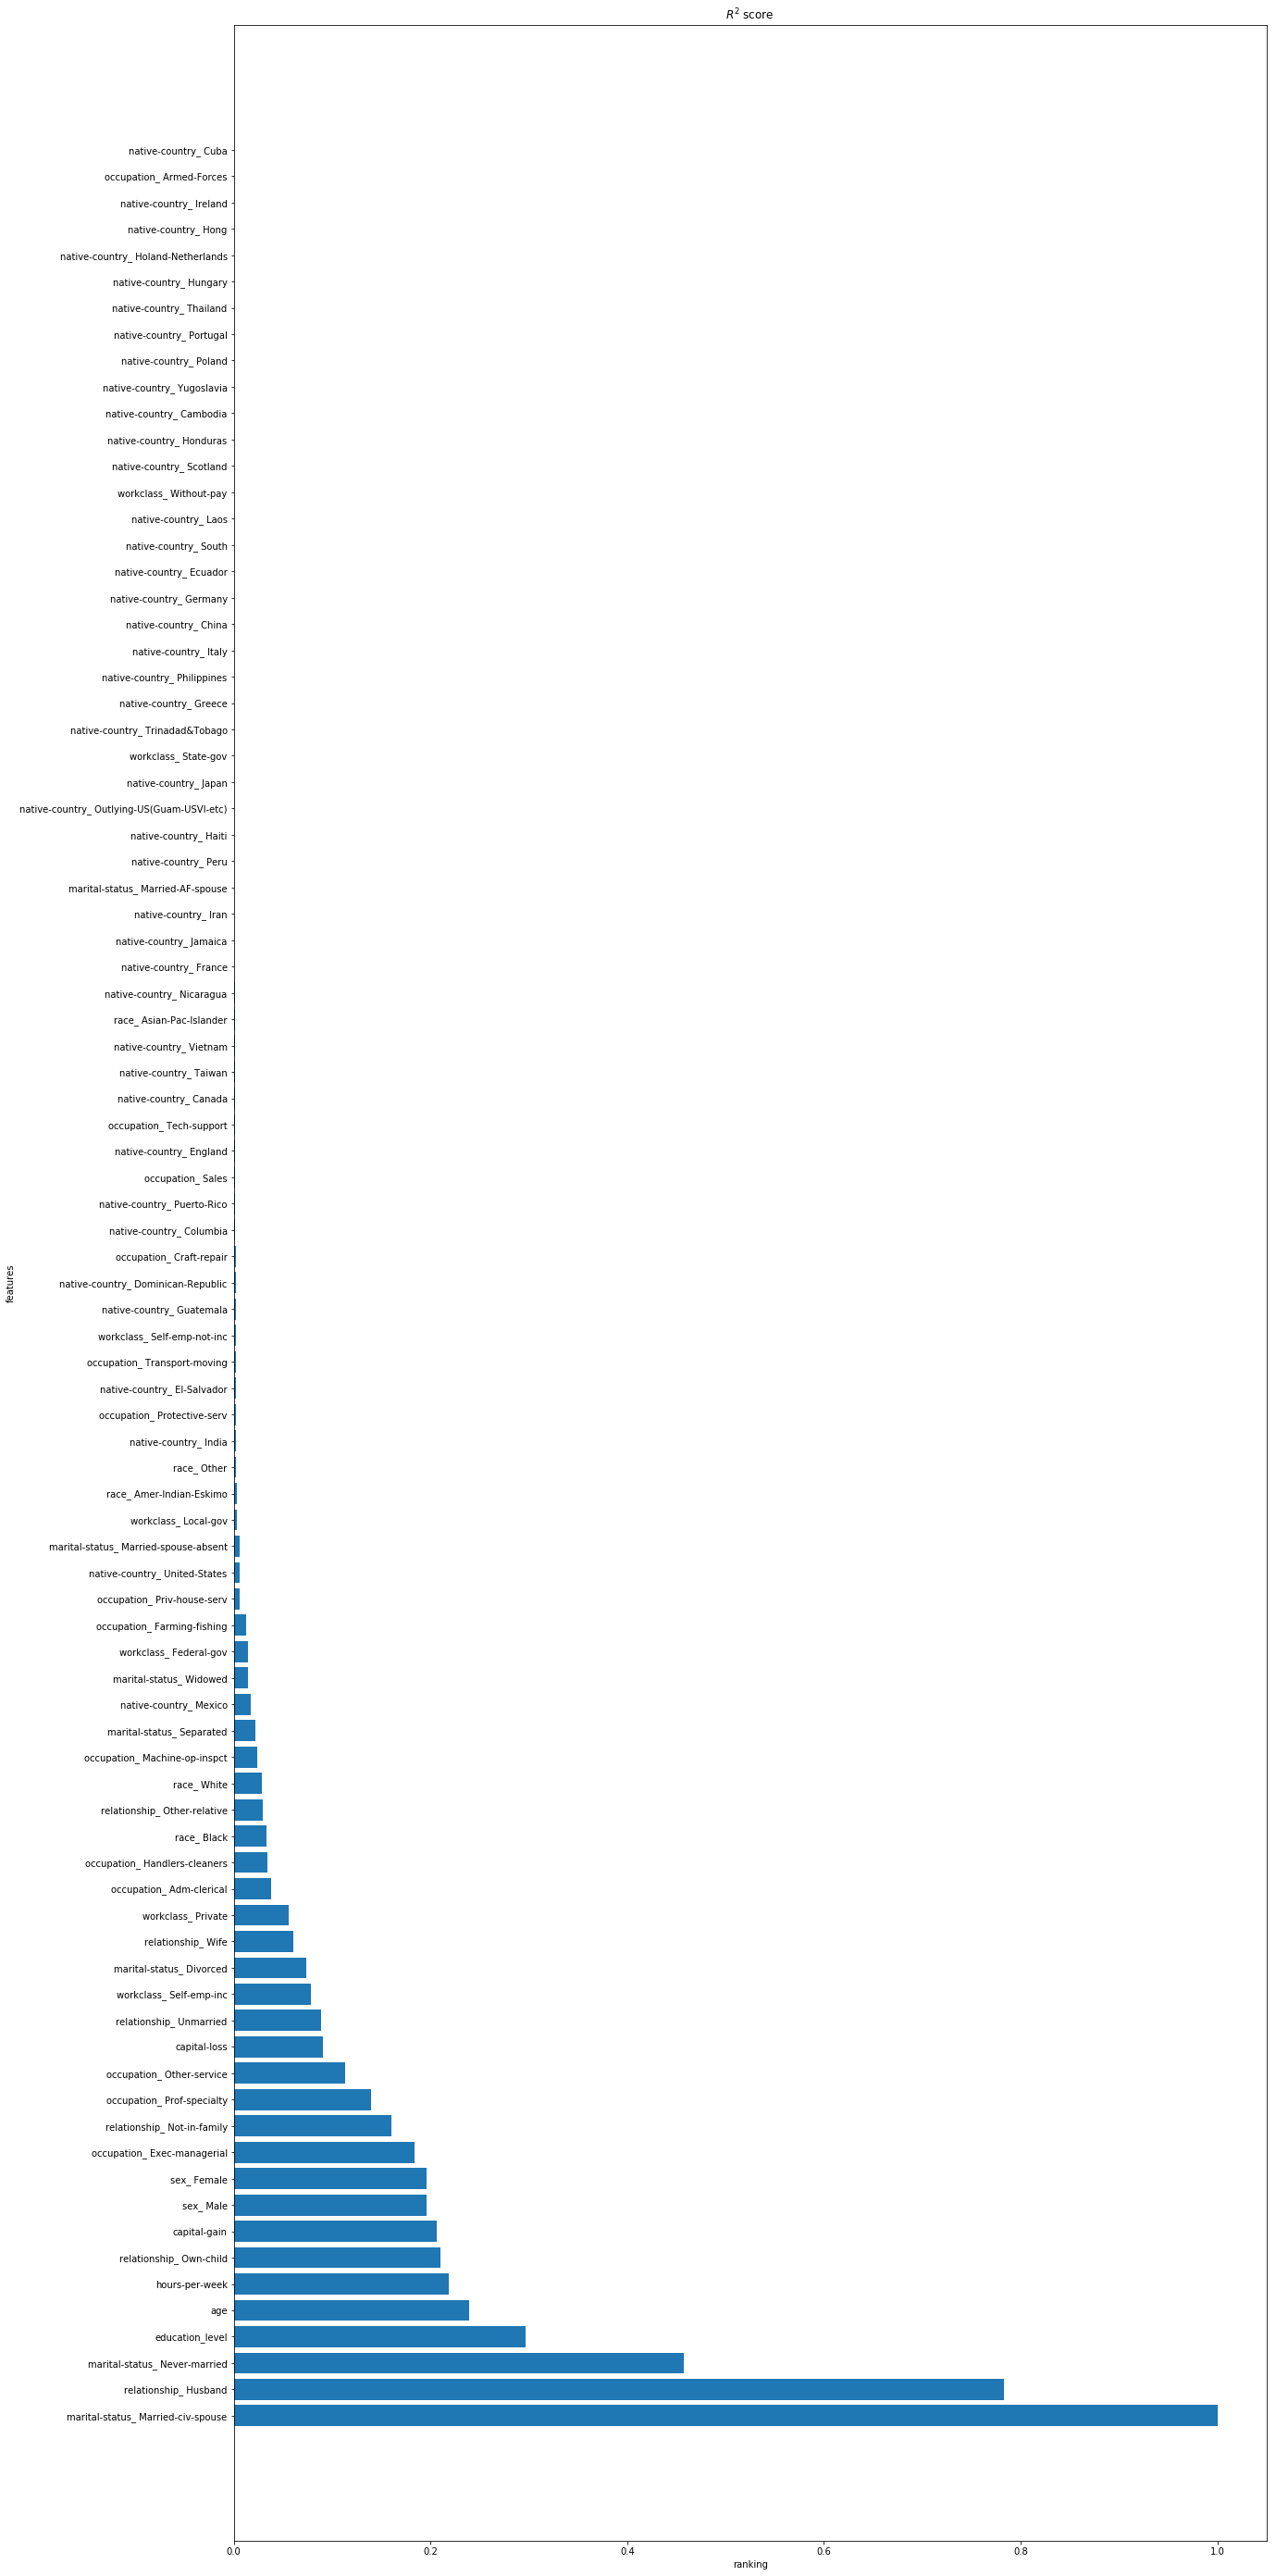

In [154]:
# convertimos el DataFrame al formato necesario para scikit-learn
income_M = income.as_matrix() 

#cogemos income
y = income_M[:,-1]
#cogemos el resto
X = income_M[:,0:-1]

feature_names = income.columns[0:-1]

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

#ordenamos por importancia
indices1 = np.argsort(f_test)[::-1]

plt.figure(figsize=(20,50))

plt.barh(range(X.shape[1]),f_test[indices1],  align="center")
plt.yticks(range(X.shape[1]),feature_names[indices1])
plt.ylabel('features')
plt.xlabel('ranking')
plt.title('$R^2$ score')

plt.show()

Text(0.5,1,'Mutual information score')

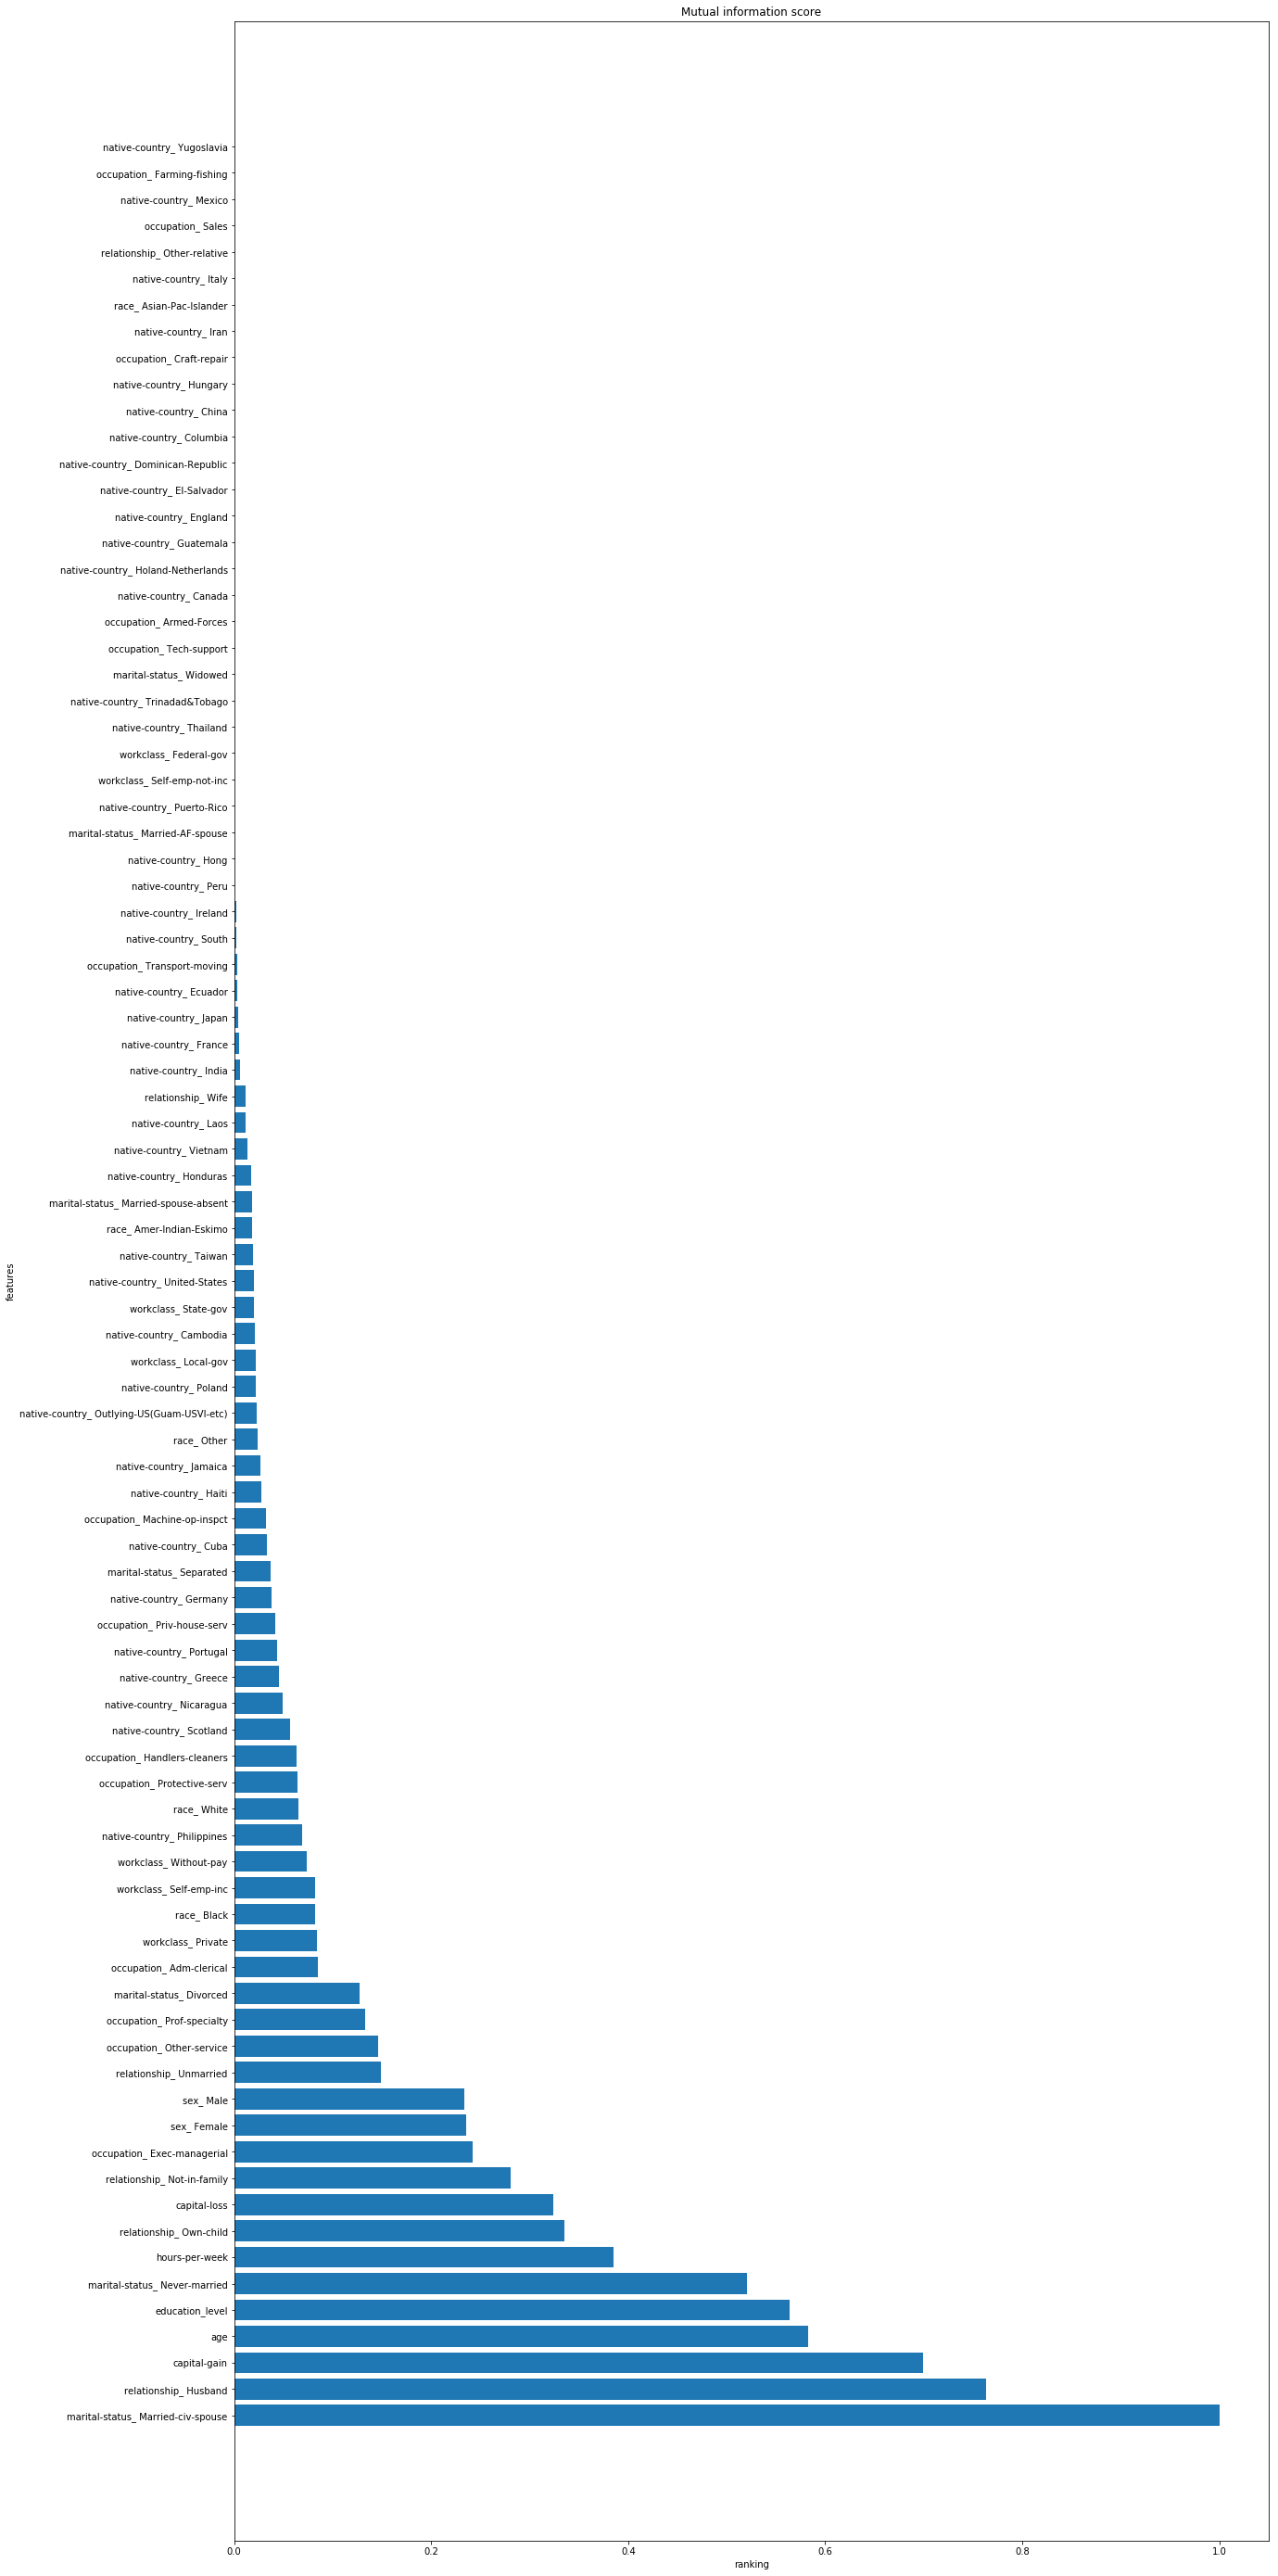

In [155]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

#ordenamos por importancia
indices2 = np.argsort(mi)[::-1]

plt.figure(figsize=(20, 50))

plt.barh(range(X.shape[1]),mi[indices2], align="center")
plt.yticks(range(X.shape[1]),feature_names[indices2])
plt.ylabel('features')
plt.xlabel('ranking')
plt.title('Mutual information score')

En condiciones normales lo mejor es entrenar el algoritmo con todas las variables y después recortar, pero visto lo que ha tardado en ejecutar la celda anterior no creo que eso sea lo más apropiado. Sacamos el efecto combinado de variables y quitamos las que veamos que son muy poco representativas

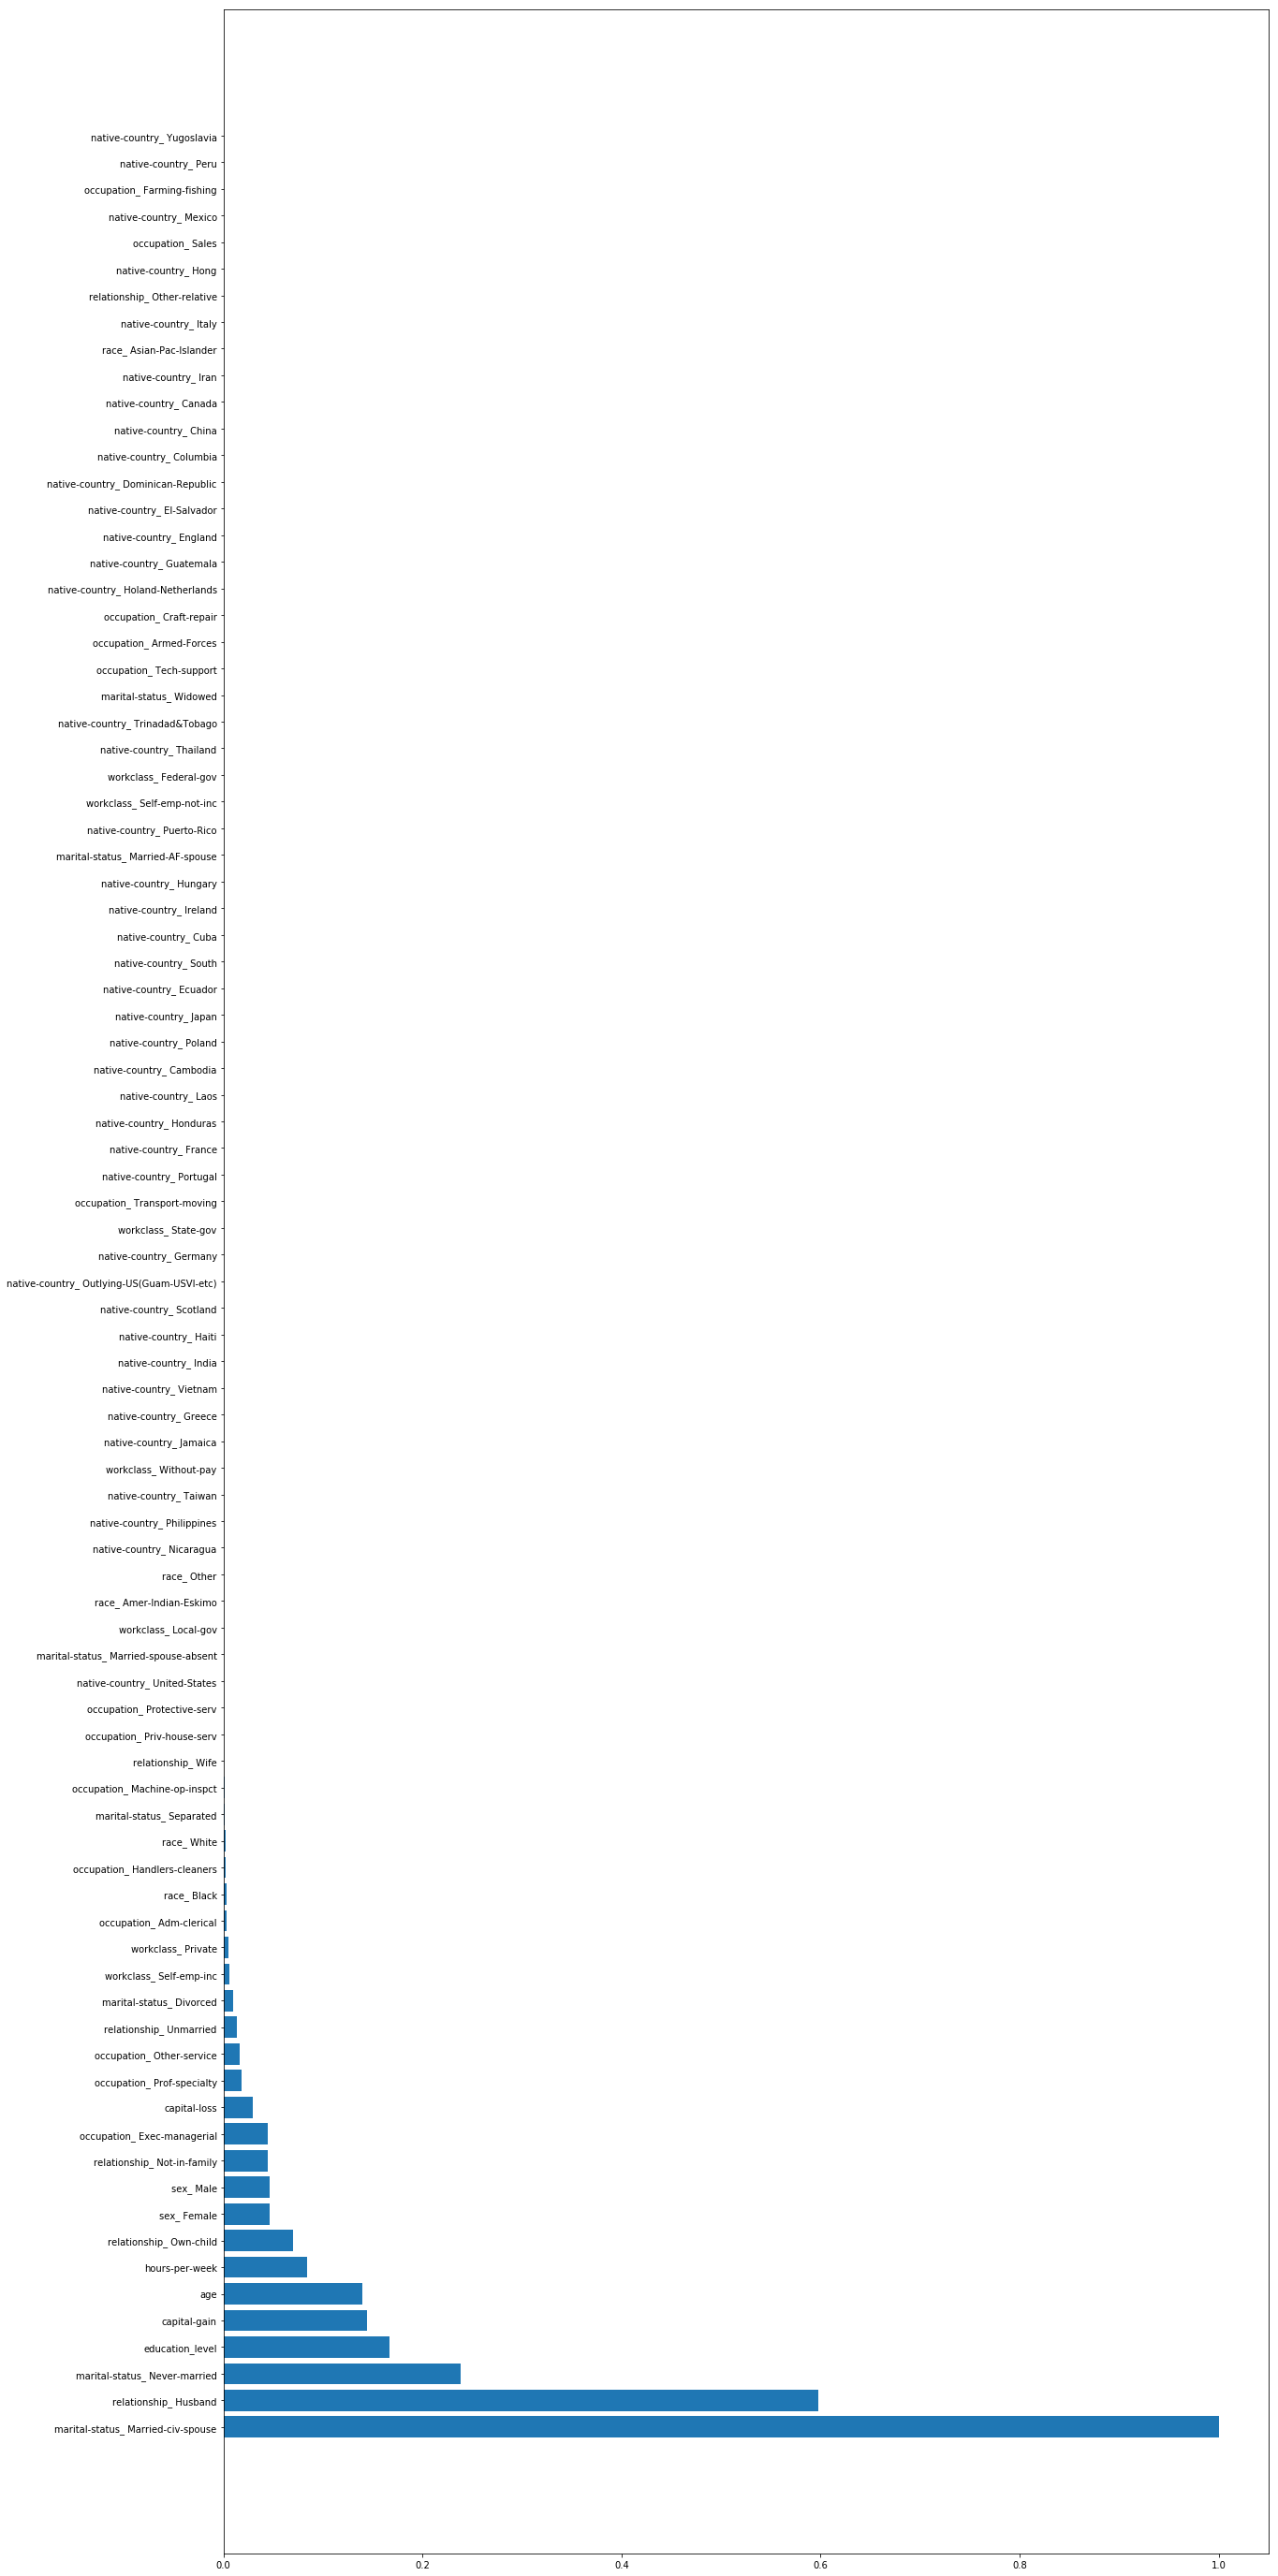

In [156]:
mi_relevancia = f_test*mi
mi_relevancia = mi_relevancia/np.max(mi_relevancia)
#Las ordenamos por importancia
indices3 = np.argsort(mi_relevancia)[::-1]

plt.figure(figsize=(20, 50))

plt.barh(range(X.shape[1]),mi_relevancia[indices3],  align="center")
plt.yticks(range(X.shape[1]),feature_names[indices3])
plt.show()

In [157]:
for f, wi, mu, rel  in zip (feature_names[indices3],f_test[indices3],mi[indices3],mi_relevancia[indices3]):
    print(f, wi, mu, rel)


marital-status_ Married-civ-spouse 1.0 1.0 1.0
relationship_ Husband 0.7833104726741801 0.7635373284238853 0.5980867856320943
marital-status_ Never-married 0.45746030519131603 0.5206192978319617 0.23816266287469787
education_level 0.2964130477681628 0.5641277261680173 0.16721481864398557
capital-gain 0.20663879806165958 0.6996981383737203 0.14458478231952632
age 0.239496646984753 0.5824479624369754 0.13949433404675698
hours-per-week 0.21896338369268117 0.384781274578716 0.08425300986333831
relationship_ Own-child 0.2098011017606334 0.3351256248209844 0.07030972531566321
sex_ Female 0.19642091069369644 0.2351776399300328 0.04619380620985127
sex_ Male 0.19642091069369969 0.23389232147080063 0.04594134278755823
relationship_ Not-in-family 0.15996990514474027 0.2809964216832346 0.044950970922678475
occupation_ Exec-managerial 0.18407602333221557 0.24212837425782766 0.04457002826927531
capital-loss 0.09094853807306344 0.3243158375883247 0.02949605130259921
occupation_ Prof-specialty 0.13991

Vamos a aplicar un método embedded de selección de características y quitaremos las que coincidan

In [158]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#dividimos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print('Datos train: ', X_train.shape)
print('Datos test: ', X_test.shape)

#escalamos y estandarizamos para poder entrenar varios algoritmos sin diferencias
scaler = preprocessing.StandardScaler().fit(X_train)

Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

Datos train:  (33916, 87)
Datos test:  (11306, 87)


best mean cross-validation score: -0.121
best parameters: {'alpha': 0.0004832930238571752}


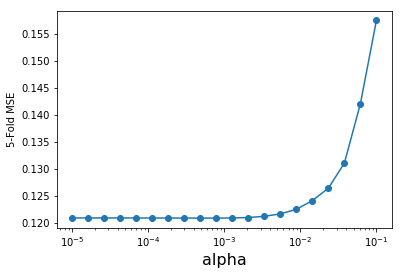

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#probamos con varias combinaciones de alpha_vector hasta que nos sentimos cómodos
alpha_vector = np.logspace(-5,-1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [160]:
from sklearn.metrics import mean_squared_error

#aumentamos alpha. Crecerá el error, pero visto el gráfico parece asumible, y eliminará características
alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(Xs_train,y_train)

ytrainLasso = lasso.predict(Xs_train)
ytestLasso  = lasso.predict(Xs_test)
mseTrainModelLasso = np.sqrt(mean_squared_error(y_train,ytrainLasso))
mseTestModelLasso = np.sqrt(mean_squared_error(y_test,ytestLasso))

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
w_abs = np.abs(w)
indices4 = np.argsort(w_abs)[::-1]
for f,wi in zip(feature_names[indices4],w[indices4]):
    print(f,wi)

MSE Modelo Lasso (train): 0.348
MSE Modelo Lasso (test) : 0.347
marital-status_ Married-civ-spouse 0.13005479313014384
education_level 0.06425087208334458
capital-gain 0.062294165914889364
occupation_ Exec-managerial 0.05084702532244752
occupation_ Prof-specialty 0.04616835669255715
capital-loss 0.03724165400102281
age 0.033416568673122184
hours-per-week 0.03181030776265669
sex_ Female -0.020453441482966052
relationship_ Wife 0.020062094026932445
occupation_ Sales 0.015615334827290172
occupation_ Farming-fishing -0.014446087748389546
relationship_ Husband 0.01238463063863907
workclass_ Self-emp-not-inc -0.010655640199700665
workclass_ Self-emp-inc 0.010158775215136103
workclass_ Federal-gov 0.009869351280400038
occupation_ Tech-support 0.007851877124193886
occupation_ Machine-op-inspct -0.004785173184534772
race_ White 0.004494530393213663
occupation_ Handlers-cleaners -0.004329670701879995
occupation_ Transport-moving -0.0039361667105456445
occupation_ Protective-serv 0.00275558040516

Salen muchas a eliminar. Voy a hacer una prueba entrenando con todo y si veo que es eterno quito las que marcan 0. Si no, al final, con el que mejor salga, entrenamos solo con las que salían aquí

## Contraste de modelos

Intentamos ir de menos a más. Empezamos con regresión logística, para hacernos una idea del aspectp del problema. Vamos a sacar distintas métricas, apoyándonos en el ejemplo que vimos en clase (Notebook 8). Como hemos visto arriba que el problema está desbalanceado, vamos a utilizar la métrica f1, un compromiso entre sensibilidad y precisión. Además, usaremos la opción class_weight = ‘balanced’, por el mismo motivo

### 1. Regresión logística

best mean cross-validation score: 0.683
best parameters: {'C': 0.08858667904100823}


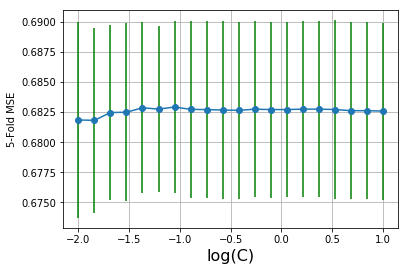

In [161]:
from sklearn.linear_model import LogisticRegression
#Probamos con varias combinaciones hasta que estrechamos el cerco
vectorC = np.logspace(-2, 1, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'), scoring= 'f1',
                    param_grid=param_grid, cv = 5)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.grid()
plt.show()

In [162]:
#Definimos la función que calcula las métricas que vamos a utilizar para medir la bondad de los algoritmos
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()
    
    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))
    
    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1,6], [1,1], color=(0.6,0.6,0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()
    

In [163]:
#definimos la función que pintará la matriz de confusión
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

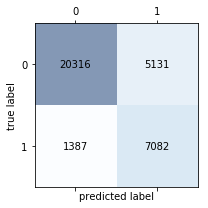

ACC:  0.8078193183158391
SEN:  0.8362262368638564
ESP:  0.7983652296930875
PPV:  0.5798739048554818
FSC:  0.6848467266221836


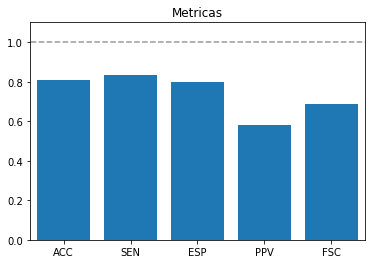

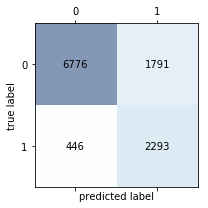

ACC:  0.8021404563948346
SEN:  0.837166849215042
ESP:  0.7909419866931248
PPV:  0.5614593535749265
FSC:  0.6721383555620695


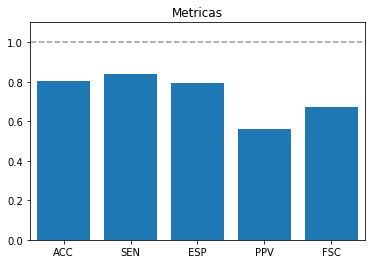

In [164]:
from sklearn.metrics import confusion_matrix

Coptimo = grid.best_params_['C']

lr = LogisticRegression(random_state=0, C = Coptimo, class_weight='balanced').fit(Xs_train,y_train)

y_pred_train = lr.predict(Xs_train)
y_pred_test = lr.predict(Xs_test)

confmat = confusion_matrix(y_train,y_pred_train)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

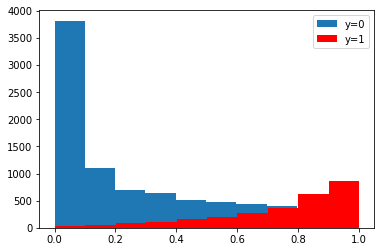

In [165]:
y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob[idx_0],normed=0,label='y=0')
plt.hist(y_prob[idx_1],normed=0,facecolor='red',label='y=1')
plt.legend()
plt.show()

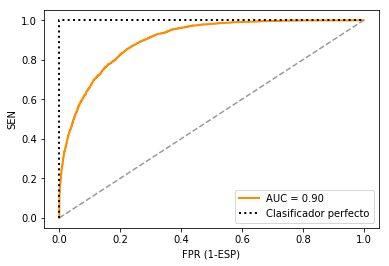

In [61]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

No se observa overfitting, las métricas de train y test son muy parecidas. La precisión es muy baja, lo que indica que la tasa de falsos positivos es alta, lo cual se explica por el solapamiento que vemos en el gráfico de probabilidad. El área bajo la curva parece bastante razonable, pero veamos qué pasa con los siguientes algoritmos

### 2. Árbol de decisión

best mean cross-validation score: 0.675
best parameters: {'max_depth': 13}


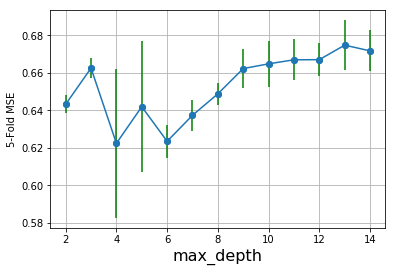

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


maxDepth = range(2,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), scoring='f1', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth, scores, yerr=std_scores, fmt='o', ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.grid()
plt.show()

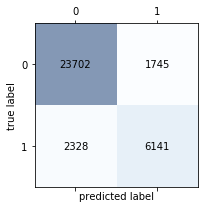

ACC:  0.879909187404175
SEN:  0.7251151257527453
ESP:  0.9314261013086022
PPV:  0.7787217854425564
FSC:  0.7509630082543566


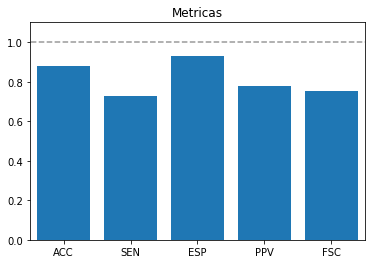

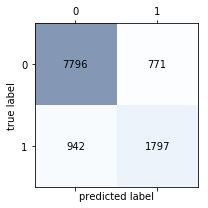

ACC:  0.8484875287457987
SEN:  0.656078860898138
ESP:  0.9100035018092681
PPV:  0.6997663551401869
FSC:  0.6772187676653477


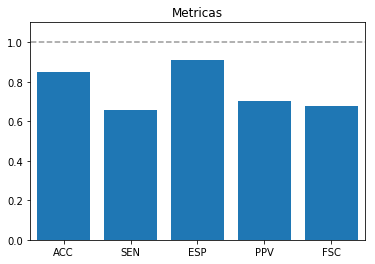

In [91]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeClassifier(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)
y_pred_train = tree.predict(Xs_train)
y_pred_test = tree.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Hay mucho overfitting. Viendo el gráfico parece razonable poner una profundidad de 10 sin mucha pérdida de prestaciones. Lo hacemos y vemos si las métricas acompañan

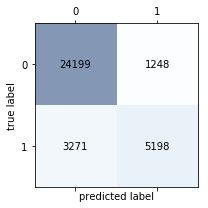

ACC:  0.8667590517749735
SEN:  0.6137678592513874
ESP:  0.9509568907926278
PPV:  0.8063915606577723
FSC:  0.6970164264163593


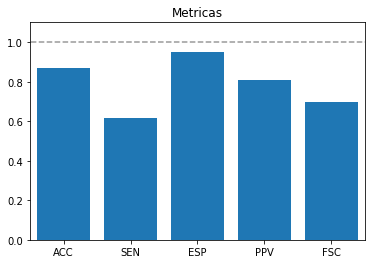

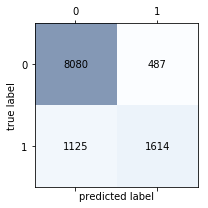

ACC:  0.8574208384928357
SEN:  0.5892661555312158
ESP:  0.9431539628808218
PPV:  0.7682056163731557
FSC:  0.6669421487603305


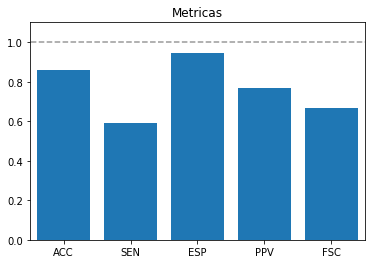

In [92]:
tree = DecisionTreeClassifier(random_state=0, max_depth= 10).fit(Xs_train,y_train)
y_pred_train = tree.predict(Xs_train)
y_pred_test = tree.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

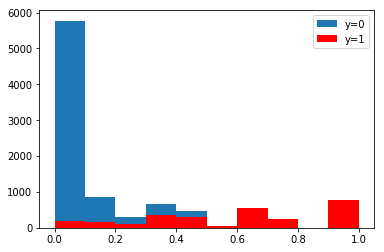

In [99]:
y_prob = tree.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob[idx_0],normed=0,label='y=0')
plt.hist(y_prob[idx_1],normed=0,facecolor='red',label='y=1')
plt.legend()
plt.show()

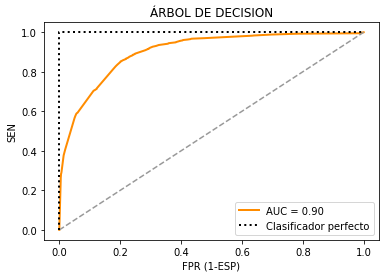

In [94]:
y_prob = tree.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.title('ÁRBOL DE DECISION')
plt.show()

Hemos eliminado el overfitting y las métricas se mantienen bastante. Con respecto de la regresión logística hemos mejorado mucho el accuracy, la precisión y la especificidad, pero hemos bajado mucho la sensibilidad. Esto quiere decir que ahora acertamos mucho mejor las muestras de la clase 0 (la mayoritaria), pero fallamos más en las de clase 1. Dependiendo del objetivo del análisis usaríamos uno u otro (si fuera más crítico identificar bien una clase o la otra), ya que en prestaciones generales (f1, ROC....) son muy similares

### 3. Random Forest

best mean cross-validation score: 0.693
best parameters: {'max_depth': 14}


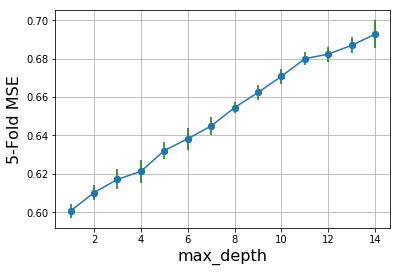

In [75]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0,n_estimators = 200, max_features='sqrt', class_weight='balanced'),
                    scoring='f1', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE',fontsize=16)
plt.grid()
plt.show()

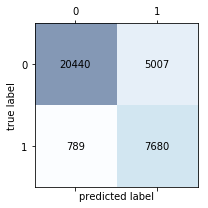

ACC:  0.8291072060384479
SEN:  0.9068366985476444
ESP:  0.8032381027233073
PPV:  0.6053440529676046
FSC:  0.7260351673284176


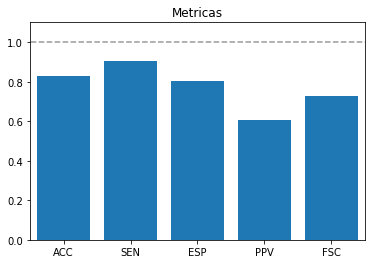

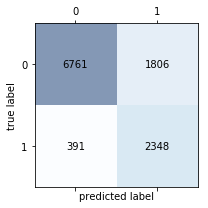

ACC:  0.8056784008491067
SEN:  0.8572471705001825
ESP:  0.7891910820590639
PPV:  0.5652383245064998
FSC:  0.6812708544900624


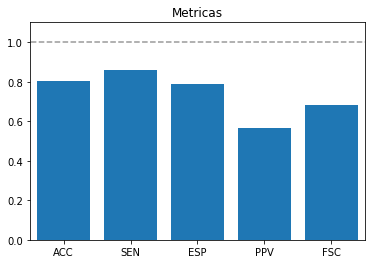

In [76]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0,
                            max_depth=depthOpt,
                            n_estimators = 200,
                            class_weight='balanced',
                            max_features='sqrt').fit(Xs_train,y_train)

y_pred_train = rf.predict(Xs_train)
y_pred_test  = rf.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

Hay mucho overfitting. Viendo el gráfico parece razonable poner una profundidad de 11 sin mucha pérdida de prestaciones. Lo hacemos y vemos si las métricas acompañan

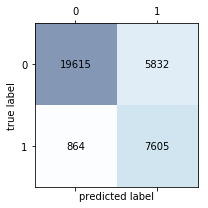

ACC:  0.8025710579077722
SEN:  0.89798087141339
ESP:  0.7708177781270876
PPV:  0.565974547890154
FSC:  0.6943303204601479


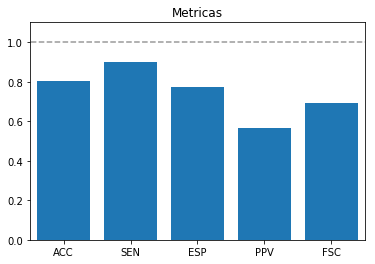

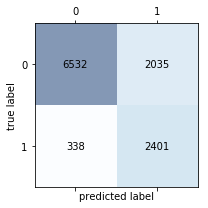

ACC:  0.7901114452503095
SEN:  0.8765972982840453
ESP:  0.7624606046457336
PPV:  0.5412533814247069
FSC:  0.6692682926829268


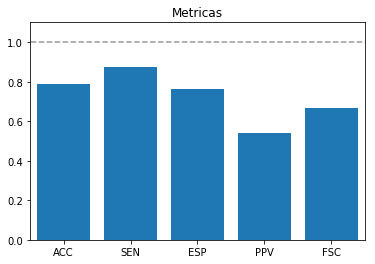

In [103]:
rf = RandomForestClassifier(random_state=0,
                            max_depth=11,
                            n_estimators = 200,
                            class_weight='balanced',
                            max_features='sqrt').fit(Xs_train,y_train)

y_pred_train = rf.predict(Xs_train)
y_pred_test  = rf.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

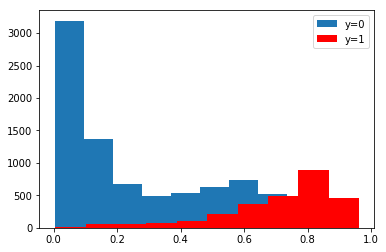

In [104]:
y_prob = rf.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob[idx_0],normed=0,label='y=0')
plt.hist(y_prob[idx_1],normed=0,facecolor='red',label='y=1')
plt.legend()
plt.show()

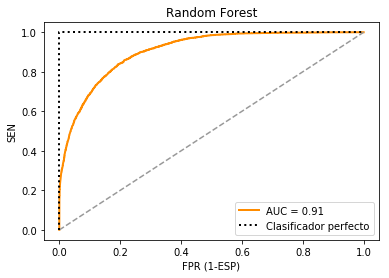

In [105]:
y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

### 5. Boosted Trees

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [50,100,300]
learningRate = [0.1,0.05,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), scoring='f1', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.698
best parameters: {'learning_rate': 0.1, 'n_estimators': 300}


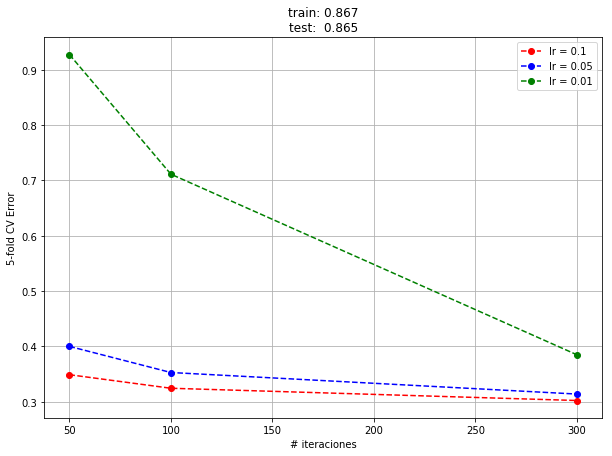

In [108]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.1, n_estimators= 300)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g']
plt.figure(figsize=(10,7))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

In [109]:
#Puesto que ha elegido el número mayor de iteraciones, vamos a aumentarlas a ver qué pasa. Dado que 0.1 y 0.05 tienen una
#trayectoria muy similar eliminamos una de ellas
Niterations = [300,400,500]
learningRate = [0.1,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), scoring='f1', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.706
best parameters: {'learning_rate': 0.1, 'n_estimators': 500}


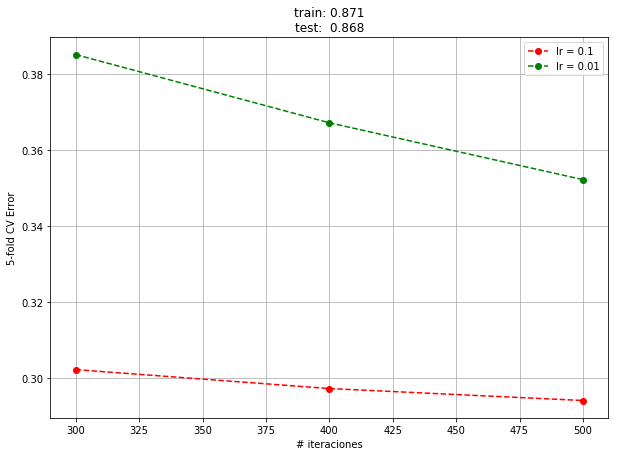

In [110]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=2,learning_rate= 0.1, n_estimators= 500)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','g']
plt.figure(figsize=(10,7))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

In [111]:
#Aumentamos profundidad y número de iteraciones para ver si mejora
Niterations = [500,700]
learningRate = [0.1,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=3), scoring='f1', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.713
best parameters: {'learning_rate': 0.1, 'n_estimators': 700}


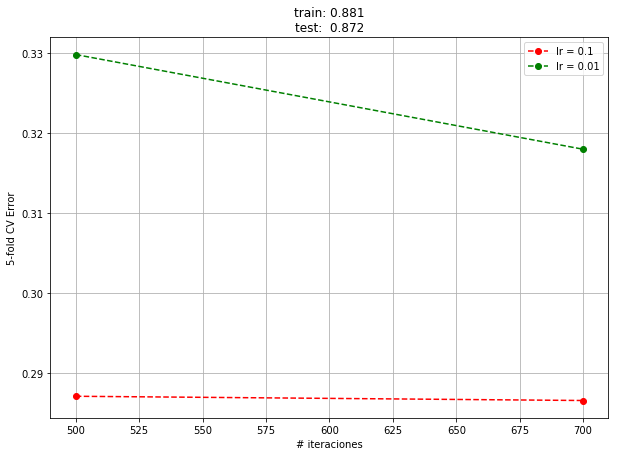

In [112]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 700)
bt.fit(Xs_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','g']
plt.figure(figsize=(10,7))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

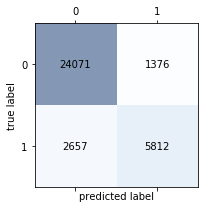

ACC:  0.8810885717655383
SEN:  0.6862675640571496
ESP:  0.9459268283098204
PPV:  0.808569838619922
FSC:  0.7424155329884398


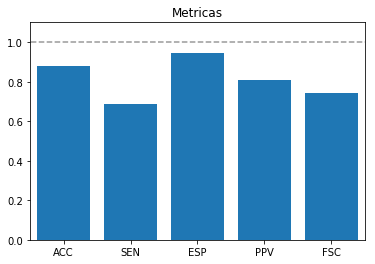

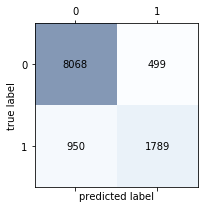

ACC:  0.8718379621439943
SEN:  0.6531580868930267
ESP:  0.941753239173573
PPV:  0.7819055944055944
FSC:  0.7117565148199722


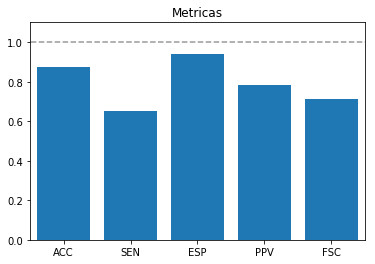

In [113]:
y_pred_train = bt.predict(Xs_train)
y_pred_test  = bt.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

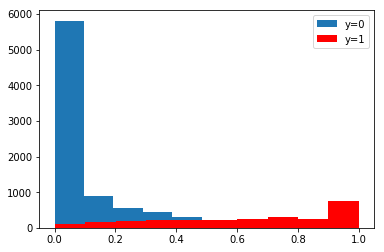

In [114]:
y_prob = bt.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob[idx_0],normed=0,label='y=0')
plt.hist(y_prob[idx_1],normed=0,facecolor='red',label='y=1')
plt.legend()
plt.show()

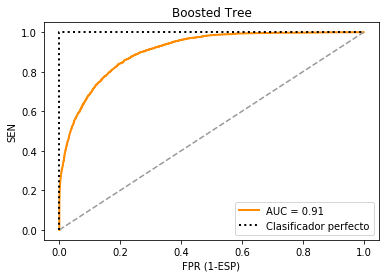

In [116]:
y_prob = bt.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Boosted Tree')
plt.legend(loc="lower right")
plt.show()

Este tiene unas métricas mejores en general, salvo la sensibilidad, que sigue siendo mucho mejor en el random forest. Conclusión: si la sensibilidad es lo más importante por el problema que tengamos entre manos, elegiría en RF con profundidad de 11. Si prefiriera ser más preciso con la otra, este último sería el ganador. Vamos a eliminar las que nos salían prescindibles en la selección de características (hacemos intersección de los dos métodos empleados) y atacamos de nuevo estos dos a ver qué nos encontramos...

In [117]:
income.head()

,age,education_level,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,39,13,2174.0,0.0,40.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0.0,0.0,13.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,8,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,6,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0.0,0.0,40.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
income_filtrado = income[["marital-status_ Married-civ-spouse","relationship_ Husband","marital-status_ Never-married","education_level","capital-gain","age","hours-per-week","relationship_ Own-child","sex_ Female","sex_ Male","occupation_ Exec-managerial","relationship_ Not-in-family","capital-loss","occupation_ Prof-specialty","occupation_ Other-service","relationship_ Unmarried","relationship_ Wife","workclass_ Self-emp-inc","workclass_ Private","marital-status_ Divorced","occupation_ Adm-clerical","relationship_ Other-relative","occupation_ Handlers-cleaners","race_ Black","marital-status_ Separated","marital-status_ Widowed","native-country_ Mexico","native-country_ Dominican-Republic","marital-status_ Married-spouse-absent","occupation_ Farming-fishing","race_ White","occupation_ Transport-moving","marital-status_ Married-AF-spouse","native-country_ South","workclass_ State-gov","workclass_ Federal-gov","workclass_ Self-emp-not-inc","native-country_ Columbia","native-country_ France","occupation_ Tech-support","occupation_ Sales","occupation_ Protective-serv","occupation_ Machine-op-inspct"
]]

In [126]:
# convertimos el DataFrame al formato necesario para scikit-learn
income_filtrado_M = income_filtrado.as_matrix() 

#cogemos income
y2 = income_filtrado_M[:,-1]
#cogemos el resto
X2 = income_filtrado_M[:,0:-1]

#dividimos los datos en entrenamiento y test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 0)

print('Datos train: ', X2_train.shape)
print('Datos test: ', X2_test.shape)

#escalamos y estandarizamos para poder entrenar varios algoritmos sin diferencias
scaler2 = preprocessing.StandardScaler().fit(X2_train)

Xs2_train = scaler2.transform(X2_train)
Xs2_test = scaler2.transform(X2_test)

Datos train:  (33916, 42)
Datos test:  (11306, 42)


### Random Forest sobre conjunto filtrado

best mean cross-validation score: 0.528
best parameters: {'max_depth': 14}


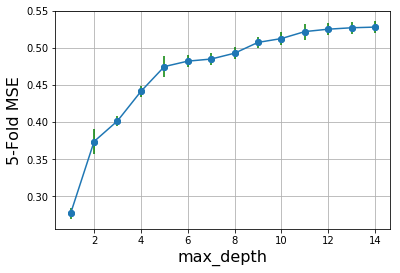

In [127]:
# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0,n_estimators = 200, max_features='sqrt', class_weight='balanced'),
                    scoring='f1', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(Xs2_train, y2_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE',fontsize=16)
plt.grid()
plt.show()

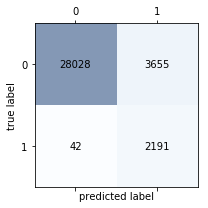

ACC:  0.8909954004009907
SEN:  0.9811912225705329
ESP:  0.8846384496417637
PPV:  0.37478617858364693
FSC:  0.5423938606263151


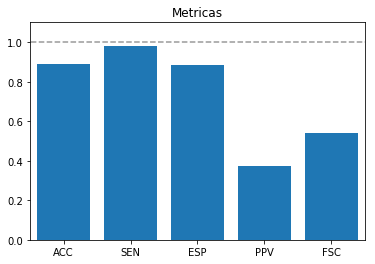

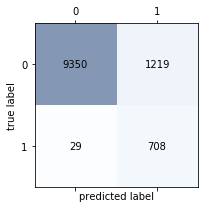

ACC:  0.8896161330267115
SEN:  0.9606512890094979
ESP:  0.8846626927807739
PPV:  0.36741048261546444
FSC:  0.5315315315315315


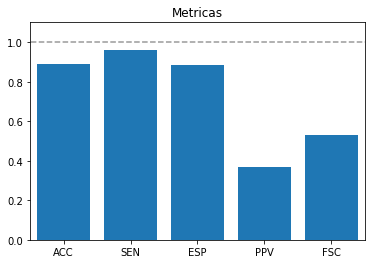

In [128]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0,
                            max_depth=depthOpt,
                            n_estimators = 200,
                            class_weight='balanced',
                            max_features='sqrt').fit(Xs2_train,y2_train)

y2_pred_train = rf.predict(Xs2_train)
y2_pred_test  = rf.predict(Xs2_test)

confmat_train  = confusion_matrix(y2_train, y2_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y2_test, y2_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

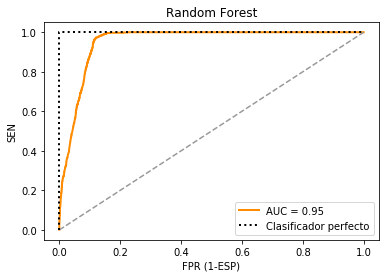

In [130]:
y2_prob = rf.predict_proba(Xs2_test)[:,1]

ejex, ejey, _ = roc_curve(y2_test, y2_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

Este resultado me descoloca. El ROC ha mejorado muchísimo, así como la sensibilidad y la especificidad, pero la precisión y el f1-score han caido en picado. Vamos a pillar muy bien a los de la clase minoritaria, pero a los otros muy mal. Si el caso requiriera eso es perfecto, eso sí.

### Boosted Tree sobre conjunto filtrado

In [131]:
#Vamos directamente a la última combinación de antes:
Niterations = [500,700]
learningRate = [0.1,0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=3), scoring='f1', param_grid=param_grid, cv = 5)
grid.fit(Xs2_train, y2_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.407
best parameters: {'learning_rate': 0.1, 'n_estimators': 700}


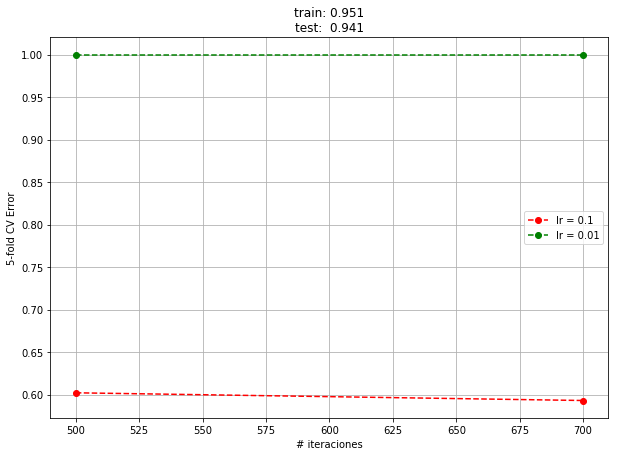

In [133]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.1, n_estimators= 700)
bt.fit(Xs2_train,y2_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','g']
plt.figure(figsize=(10,7))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs2_train,y2_train),bt.score(Xs2_test,y2_test)))
plt.grid()
plt.show()

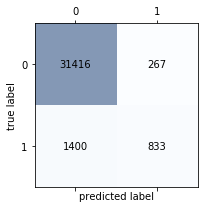

ACC:  0.9508491567401817
SEN:  0.3730407523510972
ESP:  0.9915727677303285
PPV:  0.7572727272727273
FSC:  0.4998499849984998


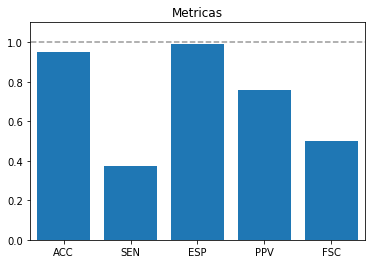

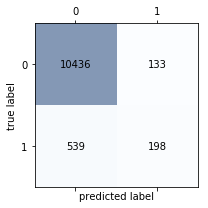

ACC:  0.9405625331682292
SEN:  0.26865671641791045
ESP:  0.9874160280064339
PPV:  0.5981873111782477
FSC:  0.3707865168539326


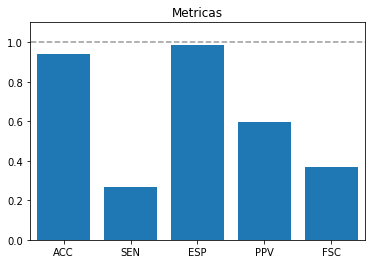

In [134]:
y2_pred_train = bt.predict(Xs2_train)
y2_pred_test  = bt.predict(Xs2_test)

confmat_train  = confusion_matrix(y2_train, y2_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y2_test, y2_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

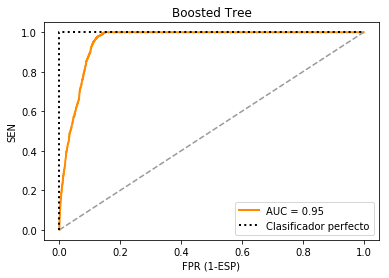

In [135]:
y2_prob = bt.predict_proba(Xs2_test)[:,1]

ejex, ejey, _ = roc_curve(y2_test, y2_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Boosted Tree')
plt.legend(loc="lower right")
plt.show()

Hay mucho overfitting, pero tengo la sensación de que una vez que ajustáramos los parámetros pasaría como con el random forest: Lo que sabían hacer bien con todo el dataset ahora lo hacen mejor, y lo que hacían regular ahora lo hacen fatal. En este caso, gran mejora en accuracy bajando aún más la sensibilidad